# Calculating topographic factors from vtm

Define S1 probes

In [1]:
from cfdmod.use_cases.s1.probe import S1Probe
import pathlib

field_data_path = pathlib.Path("./fixtures/tests/s1/vtm/00050000_.vtm") 

pitot_probe = S1Probe(p1=[10,10,1], p2=[10,10,50], numPoints=100)
example_probe = S1Probe(p1=[100,10,1], p2=[100,10,50], numPoints=100)

pitot_probe, example_probe

(S1Probe(p1=[10.0, 10.0, 1.0], p2=[10.0, 10.0, 50.0], numPoints=100),
 S1Probe(p1=[100.0, 10.0, 1.0], p2=[100.0, 10.0, 50.0], numPoints=100))

Extract data from multiblock dataset

In [2]:
from cfdmod.api.vtk.probe_vtm import read_vtm, create_line, probe_over_line, get_array_from_filter

reader = read_vtm(field_data_path)

pitot_line = create_line(pitot_probe.p1, pitot_probe.p2, pitot_probe.numPoints - 1)
probe_line = create_line(example_probe.p1, example_probe.p2, example_probe.numPoints - 1)

pitot_filter = probe_over_line(pitot_line, reader)
probe_filter = probe_over_line(probe_line, reader)

pitot_data = get_array_from_filter(pitot_filter, array_lbl="ux")
probe_data = get_array_from_filter(probe_filter, array_lbl="ux")

pitot_data[:10], probe_data[:10]

(array([0.02068254, 0.02068254, 0.02068254, 0.03970807, 0.03970807,
        0.05423942, 0.05423942, 0.06089158, 0.06089158, 0.06308953],
       dtype=float32),
 array([0.01439411, 0.01439411, 0.01439411, 0.02879969, 0.02879969,
        0.04414089, 0.04414089, 0.05661219, 0.05661219, 0.06360691],
       dtype=float32))

Create profiles from extracted data

In [3]:
from cfdmod.use_cases.s1.profile import Profile
import numpy as np

pitot_pos = np.linspace(pitot_probe.p1[2], pitot_probe.p2[2], pitot_probe.numPoints)
probe_pos = np.linspace(example_probe.p1[2], example_probe.p2[2], example_probe.numPoints)

pitot_profile = Profile(pos=pitot_pos, values=pitot_data, label="Pitot")
probe_profile = Profile(pos=probe_pos, values=probe_data, label="Example probe")

s1_profile = probe_profile / pitot_profile

s1_profile

pos: [ 0.49494949  0.98989899  1.48484848  1.97979798  2.47474747  2.96969697
  3.46464646  3.95959596  4.45454545  4.94949495  5.44444444  5.93939394
  6.43434343  6.92929293  7.42424242  7.91919192  8.41414141  8.90909091
  9.4040404   9.8989899  10.39393939 10.88888889 11.38383838 11.87878788
 12.37373737 12.86868687 13.36363636 13.85858586 14.35353535 14.84848485
 15.34343434 15.83838384 16.33333333 16.82828283 17.32323232 17.81818182
 18.31313131 18.80808081 19.3030303  19.7979798  20.29292929 20.78787879
 21.28282828 21.77777778 22.27272727 22.76767677 23.26262626 23.75757576
 24.25252525 24.74747475 25.24242424 25.73737374 26.23232323 26.72727273
 27.22222222 27.71717172 28.21212121 28.70707071 29.2020202  29.6969697
 30.19191919 30.68686869 31.18181818 31.67676768 32.17171717 32.66666667
 33.16161616 33.65656566 34.15151515 34.64646465 35.14141414 35.63636364
 36.13131313 36.62626263 37.12121212 37.61616162 38.11111111 38.60606061
 39.1010101  39.5959596  40.09090909 40.5858585

Plotting Velocity Profiles extracted

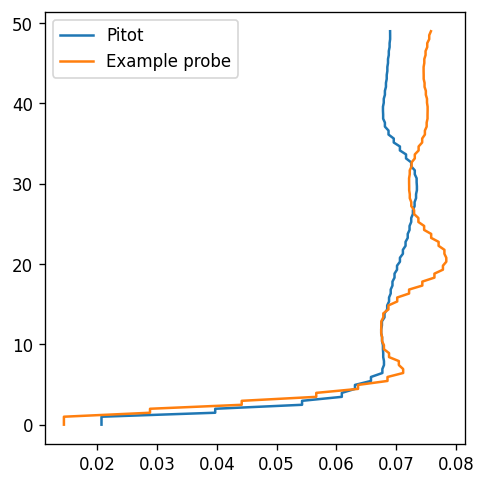

In [4]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(pitot_profile.values, pitot_profile.pos, label=pitot_profile.label)
ax.plot(probe_profile.values, probe_profile.pos, label=probe_profile.label)
# set_style_tech()
ax.legend()
plt.show(fig)
plt.close(fig)

Plotting S1

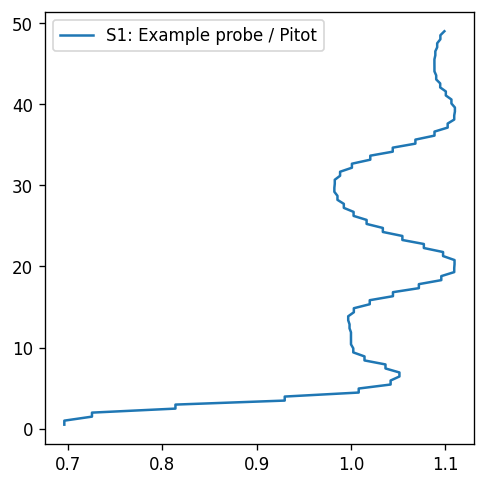

In [5]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(s1_profile.values, s1_profile.pos, label=s1_profile.label)

# set_style_tech()
ax.legend()
plt.show(fig)
# plt.close(fig)